# Week 01: Basemap Basics
Adapted from: https://cocalc.com/share/public_paths/8b892baf91f98d0cf6172b872c8ad6694d0f7204/notebooks/04.13-Geographic-Data-With-Basemap.ipynb

### Importing Tools and Defining Custom Functions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

In [5]:

from itertools import chain

def draw_map(m, scale=0.2):
    # draw a shaded-relief image
    m.shadedrelief(scale=scale)
    
    # lats and longs are returned as a dictionary
    lats = m.drawparallels(np.linspace(-90, 90, 13))
    lons = m.drawmeridians(np.linspace(-180, 180, 13))

    # keys contain the plt.Line2D instances
    lat_lines = chain(*(tup[1][0] for tup in lats.items()))
    lon_lines = chain(*(tup[1][0] for tup in lons.items()))
    all_lines = chain(lat_lines, lon_lines)
    
    # cycle through these lines and set the desired style
    for line in all_lines:
        line.set(linestyle='-', alpha=0.3, color='w')

### Mercator Projections

A cylindrical, conformal projection. Very large distortion at high latitudes, cannot fully reach the polar regions.


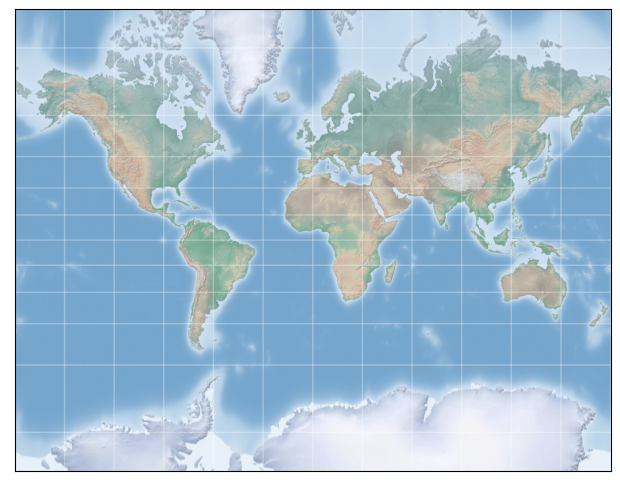

In [14]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='merc',llcrnrlat=-80,urcrnrlat=80,\
            llcrnrlon=-180,urcrnrlon=180,lat_ts=20,resolution='c')
draw_map(m)

### Cylindrical Projections

The simplest of map projections are cylindrical projections, in which lines of constant latitude and longitude are mapped to horizontal and vertical lines, respectively. This type of mapping represents equatorial regions quite well, but results in extreme distortions near the poles. The spacing of latitude lines varies between different cylindrical projections, leading to different conservation properties, and different distortion near the poles. In the following figure we show an example of the equidistant cylindrical projection, which chooses a latitude scaling that preserves distances along meridians. Other cylindrical projections are the Mercator (projection='merc') and the cylindrical equal area (projection='cea') projections.

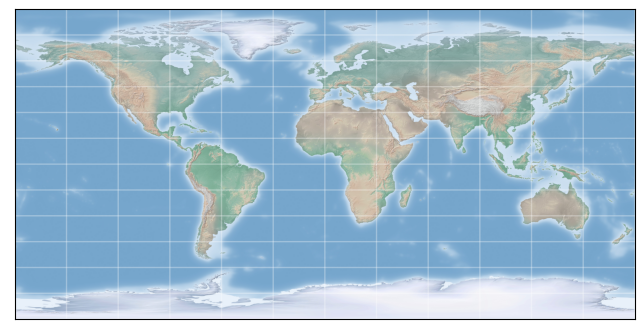

In [13]:
fig = plt.figure(figsize=(8, 6), edgecolor='w')
m = Basemap(projection='cyl', resolution=None,
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180, )
draw_map(m)

### Plotting LMU location on a Lambert Conformal Projection

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


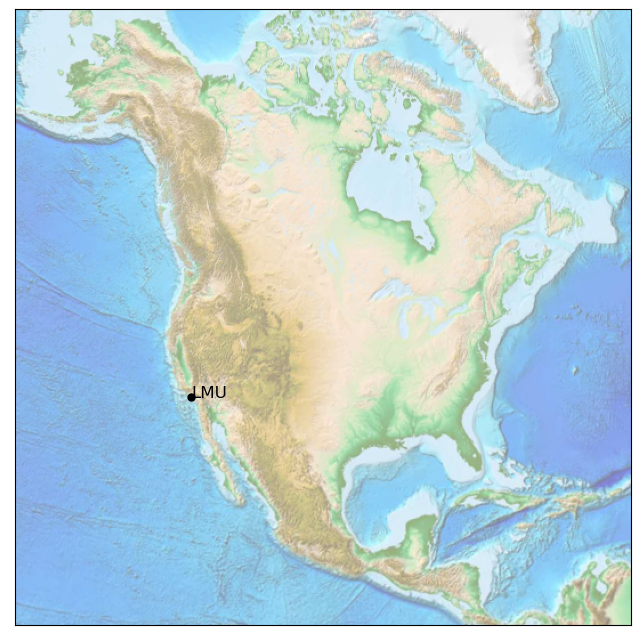

In [15]:
fig = plt.figure(figsize=(8, 8))
m = Basemap(projection='lcc', resolution=None,
            width=8E6, height=8E6, 
            lat_0=45, lon_0=-100,)
m.etopo(scale=0.5, alpha=0.5)

# Map (long, lat) to (x, y) for plotting
x, y = m(-118.4170, 33.9710)
plt.plot(x, y, 'ok', markersize=5)
plt.text(x, y, 'LMU', fontsize=12);